In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv("Portmap.csv")
df2 = pd.read_csv("UDPLag.csv")

C:\Users\athletino\AppData\Local\Temp\ipykernel_12280\4029824558.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("Portmap.csv")
C:\Users\athletino\AppData\Local\Temp\ipykernel_12280\4029824558.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("UDPLag.csv")


In [4]:
data = [df1, df2]
data = pd.concat(data)

In [5]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725160,587239,172.16.0.5-192.168.50.4-38133-51501-6,172.16.0.5,38133,192.168.50.4,51501,6,2018-11-03 11:30:25.829961,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn
725161,240180,172.16.0.5-192.168.50.4-38134-22514-6,172.16.0.5,38134,192.168.50.4,22514,6,2018-11-03 11:30:25.830168,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn
725162,12919,172.16.0.5-192.168.50.4-38135-54928-6,172.16.0.5,38135,192.168.50.4,54928,6,2018-11-03 11:30:25.830169,105,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn
725163,500419,172.16.0.5-192.168.50.4-38136-50486-6,172.16.0.5,38136,192.168.50.4,50486,6,2018-11-03 11:30:25.830219,1,2,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0,1,Syn


In [6]:
data[" Label"].value_counts()
#data.columns

Syn        606749
Portmap    186960
UDP        112475
BENIGN       8802
UDPLag       1873
Name:  Label, dtype: int64

<AxesSubplot:ylabel=' Label'>

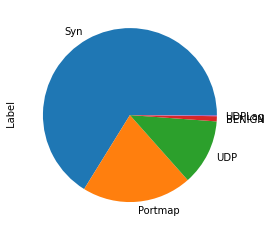

In [7]:
data[' Label'].value_counts(normalize = True).plot.pie()

In [8]:
data.describe(include='object')

,Flow ID,Source IP,Destination IP,Timestamp,SimillarHTTP,Label
count,916859,916859,916859,916859,916859,916859
unique,912452,321,357,916823,86,5
top,192.168.50.254-224.0.0.5-0-0-0,172.16.0.5,192.168.50.4,2018-11-03 09:38:23.186376,0,Syn
freq,37,906547,906553,2,875899,606749


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.astype(str) 
for i in data:
    data[i] = le.fit_transform(data[i])
data

C:\Users\athletino\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,155557,908515,149,0,202,0,0,0,7129,99,...,8693,12440,728,66984,26935,4,62982,0,0,0
1,177779,908514,148,0,202,0,0,1,7119,113,...,1268,8747,857,66904,26927,67847,61518,0,0,0
2,85073,908021,151,45235,74,38110,2,2,23329,117,...,0,11036,1151,63561,0,64195,27568,0,0,0
3,452914,908362,151,45238,127,38110,2,3,23328,117,...,0,11034,1149,63560,0,64194,27567,0,0,0
4,596608,908022,151,45239,74,38110,2,4,23327,117,...,0,11033,1148,63559,0,64193,27566,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725160,541379,290531,51,28164,160,46113,2,916818,1,57,...,0,0,0,0,0,0,0,0,1,2
725161,155760,290536,51,28165,160,13906,2,916819,1,57,...,0,0,0,0,0,0,0,0,1,2
725162,32436,290559,51,28166,160,49919,2,916820,1529,57,...,0,0,0,0,0,0,0,0,1,2
725163,444914,290571,51,28167,160,44984,2,916821,1,57,...,0,0,0,0,0,0,0,0,1,2


In [10]:
from sklearn.feature_selection import VarianceThreshold
y = data[' Label']
print(y)
X = data.drop(' Label', axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
725160    2
725161    2
725162    2
725163    2
725164    2
Name:  Label, Length: 916859, dtype: int32


In [11]:
X.var(axis=0) #variance of each variable

Unnamed: 0         3.962229e+10
Flow ID            7.000132e+10
 Source IP         1.354404e+02
 Source Port       3.244358e+08
 Destination IP    1.212160e+02
                       ...     
 Idle Std          9.674853e+07
 Idle Max          1.081540e+08
 Idle Min          1.066879e+08
SimillarHTTP       6.256229e-01
 Inbound           9.281176e-03
Length: 87, dtype: float64

In [12]:
selector = VarianceThreshold(threshold=10)
X_selected = selector.fit_transform(X)
print(X_selected.shape)
selected_indices = selector.get_support(indices=True) #boolean Array

(916859, 65)


In [13]:
selected_feature_names = np.array(X.columns)[selected_indices] #boolean indexing
selected_feature_names

array(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std',
       'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Pa

In [14]:
y = data[' Label']
X = X_selected

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (641801, 65)
Test set: (275058, 65)


# LSTM model

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

y = np.array(data[' Label']) # Convert our target to a numpy array
X = X_selected

# Define the model
model = Sequential()
num_samples = X.shape[0]
time_steps = 1
num_features = X.shape[1]

model.add(LSTM(units=128, input_shape=(time_steps, num_features)))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Reshape the input data to match the dimensions (num_samples, time_steps, num_features)
X_reshaped = X.reshape(num_samples, time_steps, num_features)

# Training
model.fit(X_reshaped, y, epochs=10, batch_size=32)


Epoch 1/10
28652/28652 [==============================] - 260s 9ms/step - loss: 1.1843 - accuracy: 0.2040
Epoch 2/10
28652/28652 [==============================] - 164s 6ms/step - loss: 1.1797 - accuracy: 0.2045
Epoch 3/10
28652/28652 [==============================] - 238s 8ms/step - loss: 1.1794 - accuracy: 0.2045
Epoch 4/10
28652/28652 [==============================] - 170s 6ms/step - loss: 1.1801 - accuracy: 0.2042
Epoch 5/10
24613/28652 [========================>.....] - ETA: 7:54 - loss: 1.1808 - accuracy: 0.2044

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

predictions = model.predict(X_test_reshaped)
y_pred = predictions > 0.5  # Convert probabilities to binary predictions
y_true = y_test

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()